<a href="https://colab.research.google.com/github/konkolyseismolab/autoeap/blob/master/examples/spline_correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### If you are in Google Colab, first install the package

In [ ]:
!pip install autoeap

## Example: fit and remove low-order spline from raw `autoEAP` light curve

As slowly varying trends can be present in the raw light curve, it may be useful to eliminate it.

As an example, you can download a light curve from MAST.

In [1]:
from autoeap import createlightcurve

targetID = 'EPIC 248783511'
campaign = 14

And enable spline correction. By default, the length of the filter window for spline correction is 20 days. If you are not satisfied with fitted spline, you can choose another length. e.g. shorter if you want to smooth your light curve more.

To compare the raw and the spline corrected light curves, you can save the results to a file.

In [2]:
time,flux,flux_err = createlightcurve(
        targetID,              # Path to TPF or EPIC ID
        apply_K2SC=False,      # Apply K2 systematic correction
        remove_spline=True,    # Fit and remove low-order spline
        save_lc=True,          # Save final light curve to file
        campaign=campaign,     # K2 campaign number if TPF should be downladed
        show_plots=False,      # Vizualize steps inside notebook
        save_plots=False,      # Save plot files in a folder
        polyorder='auto',      # The order of the detrending polynomial
        sigma_detrend=10       # The number of standard deviations to use for sigma clipping limit before spline correction.
        )

Local TPF not found, trying to download TPF instead
TPF found on MAST: K2 Campaign 14
Finding PSF centroids and removing outliers
Optimizing apertures for each cadence


100%|██████████| 3772/3772 [00:08<00:00, 433.40it/s]


Starting iteration
Using Gaia to separate sources
Iteration: 1
Using Gaia to separate sources
Iteration: 2
Using Gaia to separate sources
Iteration: 3
Iteration finished
Optimizing final aperture
Initial CDPP & PDM theta= 68929.79249927905 0.18831219323153858
Keeping aperture with initial CDPP
Removing spline
Saving lc as EPIC_248783511_c14_autoEAP_spline.lc
Done


#### Visualize the corrected result

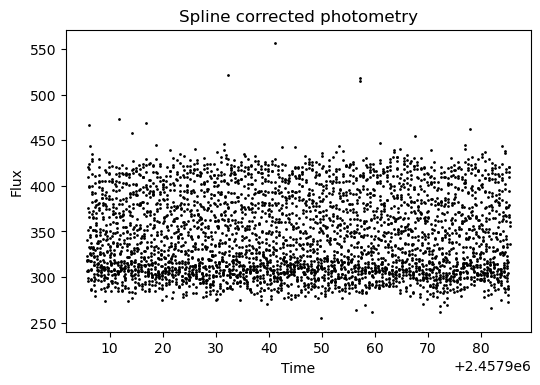

In [3]:
import matplotlib.pyplot as plt

plt.figure(dpi=100)
plt.title('Spline corrected photometry')
plt.scatter(time, flux, s=1, color='black')
plt.xlabel('Time')
plt.ylabel('Flux')
plt.show()
plt.close()

#### Compare the raw and corrected results

Load saved data.

In [4]:
import pandas as pd

lc = pd.read_csv('EPIC_248783511_c14_autoEAP_spline.lc',delim_whitespace=True)
lc

,time,flux,flux_err,splined_flux
0,2.457906e+06,310.93167,4.542228,322.529406
1,2.457906e+06,329.25284,4.542962,340.797445
2,2.457906e+06,307.36470,4.541578,318.856339
3,2.457906e+06,305.96710,4.541167,317.405977
4,2.457906e+06,295.44528,4.539751,306.831553
...,...,...,...,...
3762,2.457985e+06,387.61490,4.872160,367.805325
3763,2.457985e+06,386.00497,4.872903,366.126042
3764,2.457985e+06,379.87296,4.873064,359.924472
3765,2.457985e+06,376.19772,4.873232,356.179495


As you can see, there are four columns. Let's compare the results.

The spline can be reproduced by dividing the raw and corrected light curves.

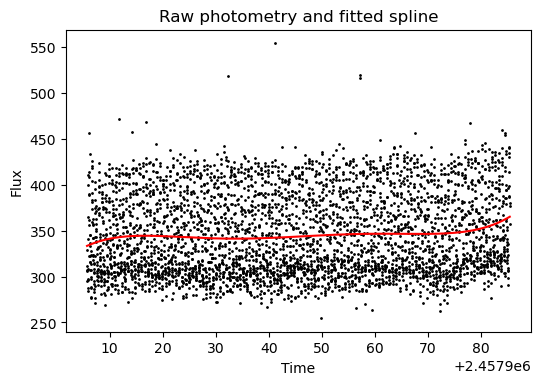

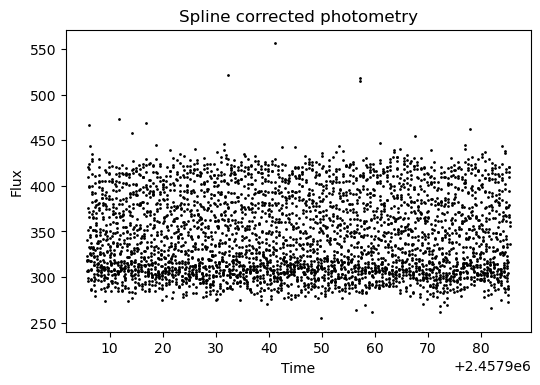

In [5]:
spline = ( lc.flux - lc.splined_flux ) + lc.flux.mean()

plt.figure(dpi=100)
plt.title('Raw photometry and fitted spline')
plt.scatter(lc.time, lc.flux, s=1, color='black')
plt.plot(lc.time, spline, c='r')
plt.xlabel('Time')
plt.ylabel('Flux')
plt.show()
plt.close()

plt.figure(dpi=100)
plt.title('Spline corrected photometry')
plt.scatter(lc.time, lc.splined_flux, s=1, color='black')
plt.xlabel('Time')
plt.ylabel('Flux')
plt.show()
plt.close()